# Deep-learning TP1: 

Le but de ce TP1 est d'acquérir les bases nécessaires à la compréhension des réseaux de neurones à partir d'un modèle simple de type Softmax. La tâche d'apprentissage consiste à classifier les images (28 par 28 pixels) de la base MNIST (http://yann.lecun.com/exdb/mnist/) en 10 catégories représentant les chiffres 0-9.

Le TP2 consistera à généraliser les concepts de ce TP1 à un réseau de neurones multi-couches.

## Téléchargement de la base d'entraînement

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt

if("mnist.pkl.gz" not in os.listdir(".")):
    print('download mnist data')
    !wget http://deeplearning.net/data/mnist/mnist.pkl.gz

## Chargement de la base en mémoire

In [31]:
import dataset_loader
train_set, valid_set, test_set = dataset_loader.load_mnist()
#train_set[1][750]

6

Vous pouvez visualiser les différents caractères en changeant l'identifiant de l'image

label: 9


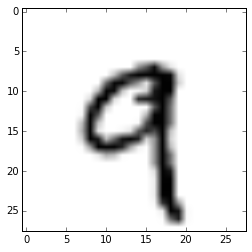

In [3]:
img_id = 903
plt.imshow(train_set[0][img_id].reshape(28,28),cmap='Greys')
print("label: " + str(train_set[1][img_id]))

Question 1: Donner les caractéristiques de la base d'apprentissage train_set

In [34]:
def getDimDataset(train_set):
    n_training = 0
    n_feature = 0
    n_label = 0
    x=train_set[0]
    #print x
    y=train_set[1]
    print y
    n_training = len(x)#x.shape[0]
    n_feature = x.shape[1]
    n_label = len(set(y))
    return n_training, n_feature, n_label

#getDimDataset (train_set)

In [25]:
x = [[1,2,3],[4,5,9,6]]
x[0][1]

2

In [35]:
n_training, n_feature, n_label = getDimDataset(train_set)
n_training

[7 2 1 ..., 9 8 7]


50000

## Création du modèle

In [6]:
def init(n_feature,n_label):
    sigma = 1.
    W = np.random.normal(loc=0.0, scale=sigma/np.sqrt(n_feature), size=(n_label,n_feature))
    b = np.zeros((W.shape[0],1))
    return W,b


In [7]:
#n_feature = 0
W,b = init(n_feature,n_label)

Question 2: Donner les dimensions de W et b ainsi que le nombre total de paramètres du modèle

In [8]:
def printInfo(W,b):
    print("W dimensions: " + str(W.shape))
    print("b dimensions: " + str(b.shape))
    print("Number of parameters: " + str(b.shape[0]+W.shape[0]*W.shape[1]))
    
printInfo(W,b)

W dimensions: (10L, 784L)
b dimensions: (10L, 1L)
Number of parameters: 7850


Question 3: Implémenter la fonction forward $$z_j = \sum_{i \rightarrow j} W_{ij} x_i + b_j$$ où $x_i$ est un pixel de l'image, $W_{ij}$ est la valeur associée à l'arête reliant les unités $i$ et $j$ et $b_j$ est le bias associé à l'unité $j$

In [11]:
def forward(W,b,X):
    
    """
        Perform the forward propagation
        :param W: the weights
        :param b: the bias
        :param X: the input (minibatch_size x n_input)
        :type W: ndarray
        :type B: ndarray
        :type X: ndarray
        :return: the transformed values
        :rtype: ndarray
    """
    #for j in X.shape:
        #for i in n_feature:
    return (np.dot(W,X.T)+b) #np.zeros((W.shape[0],X.shape[0]))

In [12]:
X=train_set[0]
f=forward(W,b,X)
print(f.shape)

(10L, 50000L)


Question 4: Implémenter la fonction softmax $$ \sigma_i = P(t=i|x,W,b) = \frac{\exp{z_i}}{\sum_k \exp{z_k}}$$

In [13]:
def softmax(z):
    """
        Perform the softmax transformation to the pre-activation values
        :param z: the pre-activation values
        :type z: ndarray
        :return: the activation values
        :rtype: ndarray
    """
    
    p = np.max(z, 0)
    
    return np.exp(z-p)/np.sum(np.exp(z-p))

Optionnel: Vérifier que votre implémentation de softmax soit numériquement stable (cf. http://ufldl.stanford.edu/wiki/index.php/Exercise:Softmax_Regression)

In [14]:
# Example for testing the numerical stability of softmax
# It should return [1., 0. ,0.], not [nan, 0., 0.]
z = [1000000,1,100]
print(softmax(z))

[ 1.  0.  0.]


Question 5: Implémenter le calcul du gradient de l'erreur par rapport à $z_i$:
$$\delta z_i = \sigma_i - 1_{i=l}$$
où $l$ est l'étiquette associée à la donnée courante.

In [ ]:
def gradient_out(out, one_hot_batch):
    """
    compute the gradient w.r.t. the pre-activation values of the softmax z_i
    :param out: the softmax values
    :type out: ndarray
    :param one_hot_batch: the one-hot representation of the labels
    :type one_hot_batch: ndarray
    :return: the gradient w.r.t. z
    :rtype: ndarray
    """
    return out

Question 6: Implémenter la fonction du calcul de gradient par rapport aux paramètres: $$\delta W_{ij} = \delta z_j x_i$$  $$\delta b_{j} = \delta z_j$$ où $\delta W_{ij}$ est la composante du gradient associée à l'arête reliant les unités $i$ et $j$, $\delta b_{j}$ est la composante du gradient associée au bias de l'unité $j$, $\delta z_j$ est le gradient de l'erreur par rapport à l'unité $j$ et $x_i$ est la valeur d'activation de l'unité $i$.

In [ ]:
def gradient(derror, X):
    """
        Compute the gradient w.r.t. the parameters
        :param derror: the gradient w.r.t. z
        :param X: the input (minibatch_size x n_input)
        :param minibatch_size: the minibatch size
        :type derror: ndarray
        :type minibatch: ndarray
        :type minibatch_size: unsigned
        :return: the gradient w.r.t. the parameters
        :rtype: ndarray, ndarray
    """
    grad_w = np.zeros((derror.shape[0],X.shape[1]))
    grad_b = np.zeros((derror.shape[0]))
    return grad_w,grad_b

Question 7: Implémenter la fonction de mise à jour des paramètres $$p = p - \eta \delta p$$ où $p$ est un paramètre du modèle et $\delta p$ la composante du gradient associée à p.

In [ ]:
def update(eta, W, b, grad_w, grad_b):
    """
        Update the parameters with an update rule
        :param eta: the step-size
        :param W: the weights
        :param b: the bias
        :param grad_w: the gradient w.r.t. the weights
        :param grad_b: the gradient w.r.t. the bias
        :type eta: float
        :type W: ndarray
        :type b: ndarray
        :type grad_w: ndarray
        :type grad_b: ndarray
        :return: the updated parameters
        :rtype: ndarray, ndarray
    """
    return W,b

## Algorithme d'apprentissage

In [ ]:
import math,time
from IPython.display import clear_output
from aux import *

# Data structures for plotting
g_i = []
g_train_loss=[]
g_train_acc=[]
g_valid_loss=[]
g_valid_acc=[]

n_training, n_feature, n_label = getDimDataset(train_set)

# SGD parameters
eta = 0.001
batch_size = 500
n_batch = int(math.ceil(float(n_training)/batch_size))
n_epoch = 100

cumul_time = 0.

# Initialize the model parameters
W,b = init(n_feature,n_label)
printInfo(W,b)

# Convert the labels to one-hot vector
one_hot = np.zeros((n_label,n_training))
one_hot[train_set[1],np.arange(n_training)]=1.

for i in range(n_epoch):
    for j in range(n_batch):

        ### Mini-batch creation
        minibatch, one_hot_batch, minibatch_size = getMiniBatch(j, batch_size, train_set, one_hot)

        prev_time = time.clock()

        ### Forward propagation
        Z = forward(W,b,minibatch)

        ### Compute the softmax
        out = softmax(Z)

        ### Compute the gradient at the top layer
        derror = gradient_out(out,one_hot_batch)

        ### Compute the gradient w.r.t. parameters
        grad_w,grad_b = gradient(derror, minibatch)

        ### Update the parameters
        W,b = update(eta, W, b, grad_w, grad_b)
        
        curr_time = time.clock()
        cumul_time += curr_time - prev_time
    
    ### Training accuracy
    train_loss, train_acc = computeLoss(W, b, train_set[0], train_set[1],softmax) 
    
    ### Valid accuracy
    valid_loss, valid_acc = computeLoss(W, b, valid_set[0], valid_set[1],softmax) 

    g_i = np.append(g_i, i)
    g_train_loss = np.append(g_train_loss, train_loss)
    g_train_acc = np.append(g_train_acc, train_acc)
    g_valid_loss = np.append(g_valid_loss, valid_loss)
    g_valid_acc = np.append(g_valid_acc, valid_acc)
    
    result_line = str(i) + " " + str(cumul_time) + " " + str(train_loss) + " " + str(train_acc) + " " + str(valid_loss) + " " + str(valid_acc) + " " + str(eta)
    print(result_line)

In [ ]:
plt.plot(g_i,g_train_loss,label='train_loss')
plt.plot(g_i,g_valid_loss,label='valid_loss')
plt.xlabel("epoch")
plt.ylabel("Negative log-likelihood")
plt.legend()

In [ ]:
plt.plot(g_i,1.0-g_train_acc,label='train_acc')
plt.plot(g_i,1.0-g_valid_acc,label='valid_acc')
plt.xlabel("epoch")
plt.ylabel("Classification error")
plt.ylim([0.,1.])
plt.legend()

Question 8: Montrer, à l'aide d'une figure, l'effet du step-size (prendre $\eta$=[0.01,0.1,1.0,10.]) sur les courbes d'apprentissage